Distancia entre un punto `x_i` y un centroide `c_j`:

$ D(x_i, c_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - c_{jk})^2} $

Donde:
- `x_i` es el punto de datos `i`.
- `c_j` es el centroide `j`.
- `n` es el número de dimensiones/características de tus datos.
- `x_{ik}` es la coordenada `k`-ésima del punto de datos `i`.
- `c_{jk}` es la coordenada `k`-ésima del centroide `j`.

Intracluster: Un intracluster es como la "fuerza de unión" dentro de un grupo en un montón de datos, muestra cuán similares son los puntos dentro de ese grupo.

 La función objetivo: la suma de distancias intraclúster.


 k = numero actual del cluster


 $\mu = \text{Centroide}$ 


 Fomrmula de funcion objetivo

 $[ J = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2 ]$

 Donde:
- $ J $ es la función objetivo.
- $ k $ es el número de clusters.
- $ x $ es un punto de datos.
- $ C_i $ es el conjunto de puntos asignados al cluster $ i $.
- $ \mu_i $ es el centroide del cluster $ i $.
- $ \| x - \mu_i \|^2 $ es la distancia euclidiana al cuadrado entre el punto de datos $ x $ y el centroide $ \mu_i $.

El objetivo de K-means es encontrar los centroides $ \mu_i $ que minimicen esta función.


Desglosando:
- $ J $ es la función objetivo, que queremos minimizar.
- La primera suma ($ \sum_{i=1}^{k} $) recorre cada uno de los $ k $ clusters.
- La segunda suma ($ \sum_{x \in C_i} $) recorre cada punto $ x $ dentro del cluster $ C_i $.
- $ \| x - \mu_i \|^2 $ es la distancia euclidiana al cuadrado entre el punto $ x $ y el centroide $ \mu_i $.

En resumen, estamos sumando todas las distancias cuadradas de cada punto a su respectivo centroide para todos los clusters. La meta es encontrar la configuración de los centroides que minimice esta suma total.

 

In [70]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('D:/Tripleten/datasets/segments.csv')
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])
data.head()



,timespent,purchase,months
0,9.749627,26.984142,14.0
1,30.416766,5.916530,15.0
2,8.809746,35.502827,14.0
3,31.418008,9.820529,18.0
4,48.279014,18.359423,2.0


In [71]:
model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
centroids

,timespent,purchase,months
0,10.686322,98.902750,10.856
1,50.062015,19.627015,1.808
2,20.565505,20.145134,15.204


In [64]:
centroids_init = pd.DataFrame(centers, columns=data.columns)
centroids_init['label']=4

In [72]:
data['label'] = model.labels_.astype(str)
data

,timespent,purchase,months,label
0,9.749627,26.984142,14.0,2
1,30.416766,5.916530,15.0,2
2,8.809746,35.502827,14.0,2
3,31.418008,9.820529,18.0,2
4,48.279014,18.359423,2.0,1
...,...,...,...,...
495,30.498767,13.154907,15.0,2
496,7.192033,27.348396,9.0,2
497,20.174739,98.147402,29.0,0
498,56.226202,22.613374,1.0,1


In [66]:
centroids['label']= ['0 centroid','1 centroid','2 centroid']
centroids

,timespent,purchase,months,label
0,10.686322,98.902750,10.856,0 centroid
1,50.062015,19.627015,1.808,1 centroid
2,20.565505,20.145134,15.204,2 centroid


In [67]:
data_all = pd.concat([data,centroids],ignore_index=True)
data_all

,timespent,purchase,months,label
0,9.749627,26.984142,14.000,2
1,30.416766,5.916530,15.000,2
2,8.809746,35.502827,14.000,2
3,31.418008,9.820529,18.000,2
4,48.279014,18.359423,2.000,1
...,...,...,...,...
498,56.226202,22.613374,1.000,1
499,54.934903,19.252892,4.000,1
500,10.686322,98.902750,10.856,0 centroid
501,50.062015,19.627015,1.808,1 centroid


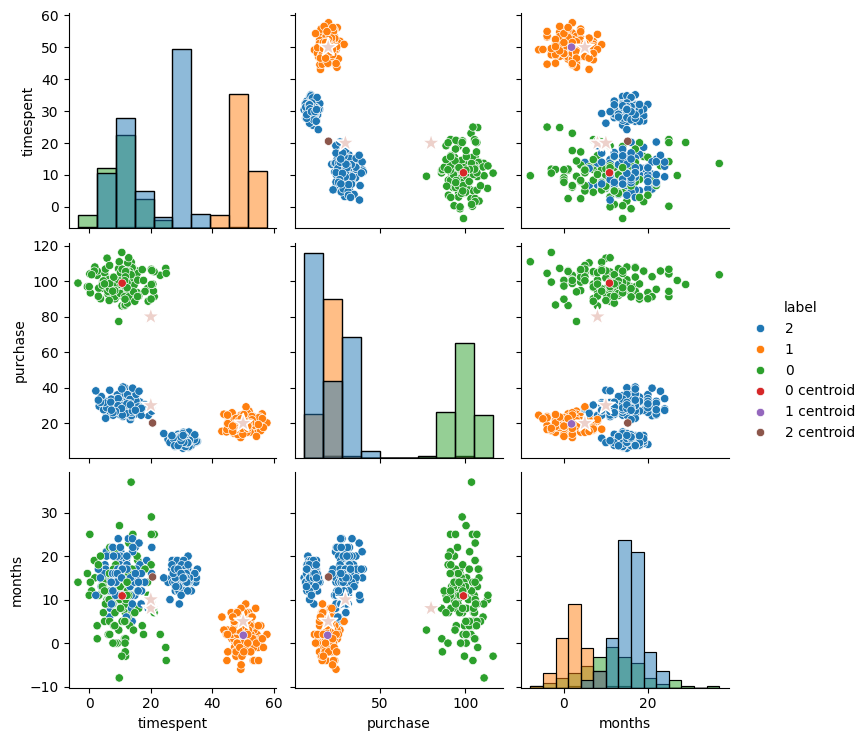

In [87]:
pairgrid = sns.pairplot(data_all,hue='label', diag_kind='hist')

pairgrid.data = centroids_init

pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')



In [89]:
# model.inertia_ = devuelve la función objetivo
# model.labels_.astype(str) = devuelve las clasificaciones especificadas en k
# model.cluster_centers_ devuelve los centroides calculados depues que el modelo ha convergido

array([[10.68632155, 98.90275017, 10.856     ],
       [50.06201472, 19.62701512,  1.808     ],
       [20.56550497, 20.14513373, 15.204     ]])

In [ ]:
import matplotlib.pyplot as plt

plt.plot()
plt.xlabel
plt.ylabel
plt.legend()